<a href="https://colab.research.google.com/github/mirjanaa/Bee-Colony-Optimization/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import random
import numpy as np
from matplotlib import pyplot as plt

In [18]:
class FoodSource:
  def __init__(self, bounds, obj_function):
    self.position = np.array([random.uniform(bound[0], bound[1]) for bound in bounds])
    self.obj_value = obj_function(self.position)
    self.fitness = self.calculate_fitness()
    self.trial = 0
    self.probability = 0

  def __lt__(self, other):
    return self.obj_value < other.obj_value

  def __gt__(self, other):
    return self.fitness > other.fitness

  def calculate_fitness(self):
    if self.obj_value >= 0:
      return 1 / (1 + self.obj_value)
    return 1 + abs(self.obj_value) 

In [19]:
def rastrigin(x):
    A = 10
    n = len(x)
    return A*n + sum(x_i**2 - A*np.cos(2*np.pi*x_i) for x_i in x)

In [20]:
def rosenbrock(x):
    a = 1
    b = 100
    return (a - x[0]) ** 2 + b * (x[1] - x[0]**2)**2

In [21]:
bounds = np.array([(-5.12, 5.12), (-5.12, 5.12)])

In [22]:
def generate_new_solution(i, population, lb, ub, obj_function):

  j = random.randrange(len(bounds))
  partner = random.randrange(len(population))

  while i == partner:
    partner = random.randrange(len(population))

  phi = random.uniform(-1, 1)

  old_fitness = population[i].fitness
  old_objective_value = population[i].obj_value

  old_j = population[i].position[j]
  new_j = population[i].position[j] + phi * (population[i].position[j] - population[partner].position[j])

  population[i].position[j] = new_j
  population[i].position[j] = np.clip(population[i].position[j], lb[j], ub[j])
  
  new_objective_value = obj_function(population[i].position)
   
  population[i].obj_value = new_objective_value
  population[i].fitness = population[i].calculate_fitness()

  if population[i].fitness > old_fitness:
    population[i].trial = 0
  
  else:
    population[i].position[j] = old_j
    population[i].obj_value = old_objective_value
    population[i].fitness = old_fitness
    population[i].trial = population[i].trial + 1 

  

In [23]:
POPULATION_SIZE = 50
NUM_OF_ITERATIONS = 100
LIMIT = 5

lower_bound = np.array([x[0] for x in bounds])
upper_bound = np.array([x[1] for x in bounds])


population = [FoodSource(bounds, rastrigin) for _ in range(POPULATION_SIZE)]

best_solution = min(population)

obj_values = []
fitness_values = []

for k in range(NUM_OF_ITERATIONS):
  #### Employed Bee Phase ####
  for i in range(POPULATION_SIZE):
    generate_new_solution(i, population, lower_bound, upper_bound, rastrigin)

  #### Onlooker Bee Phase ####
  max_fitness = max([population[i].fitness for i in range(POPULATION_SIZE)])
  for i in range(POPULATION_SIZE):
    population[i].probability = 0.9 * (population[i].fitness / max_fitness) + 0.1


  m = 0
  n = 0

  while m < POPULATION_SIZE and n < POPULATION_SIZE:
    rand_value = random.uniform(0, 1)
    if rand_value < population[n].probability:
      generate_new_solution(n, population, lower_bound, upper_bound, rastrigin)
      m += 1
    n = (n % POPULATION_SIZE) + 1

  best_solution = min(min(population), best_solution)

  #### Scout Bee Phase ####
  max_index = -1
  max_trial = float('-inf')
  for index, p in enumerate(population):
    if p.trial > max_trial:
      max_trial = p.trial
      max_index = index


  if population[max_index].trial > LIMIT:
    population[max_index] = FoodSource(bounds, rastrigin)

  best_solution = min(min(population), best_solution)

  obj_values.append(best_solution.obj_value)
  fitness_values.append(best_solution.fitness)

print("position: ", [i for i in best_solution.position])
print("objective value: ", best_solution.obj_value)
print("fitness value: ", best_solution.fitness)

position:  [-0.00011543842735398459, -0.00015676091346112885]
objective value:  7.5190625068444206e-06
fitness value:  0.999992480994029


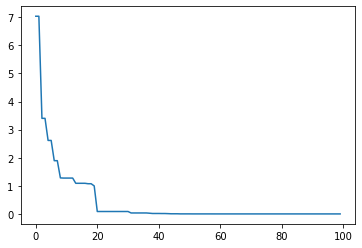

In [24]:
plt.plot(range(NUM_OF_ITERATIONS), obj_values)

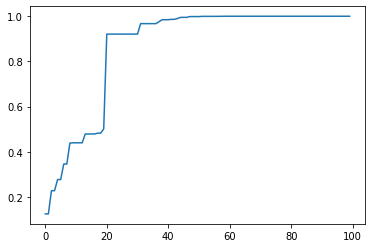

In [25]:
plt.plot(range(NUM_OF_ITERATIONS), fitness_values)